In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving testbatch_utf8.csv to testbatch_utf8.csv


In [29]:
df = pd.read_csv("testbatch_utf8.csv", sep=';', decimal=",").dropna()

#df.column1 = df.column1.astype(float)
df = df.loc[3:]
print(df.head(10))
print(f"df shape: {df.shape}")
dft = df.T
print(f"df index: {dft.index}")
print(df.dtypes)

for col in list(dft.index[1:]):
  df[col] = df[col].str.replace(',', '.', regex=False)
  df[col] = df[col].astype(float)

# convert the 'Date' column to datetime format
df['PDatTime'] = df['PDatTime'].astype('datetime64[ns]')
#dfy = df.drop(columns=['PDatTime'])
#dfy.astype(float)

# Check the format of 'Date' column
print(df.info())
print(df.describe())

            PDatTime          Age        ACIDT  ...        STIRR SUBS         TEMP
3   02.03.2021 12:22     8,33E-02         12,1  ...  373,0579407    0  29,33287375
4   02.03.2021 12:27  0,166666667         12,1  ...  404,7222901    0  29,31725831
5   02.03.2021 12:32         0,25         12,1  ...  404,8540494    0  29,36113787
6   02.03.2021 12:37  0,333333333         12,1  ...  404,9954456    0  29,44320305
7   02.03.2021 12:42  0,416666667         12,1  ...     404,9955    0  29,54741456
8   02.03.2021 12:47          0,5         12,1  ...  405,1252717    0  29,64561902
9   02.03.2021 12:52  0,583333333         12,1  ...  405,2684033    0  29,72760542
10  02.03.2021 12:57  0,666666667         12,1  ...     405,2685    0  29,80329491
11  02.03.2021 13:02         0,75         12,1  ...  405,4605092    0  29,86310631
12  02.03.2021 13:07  0,833333333  12,14672222  ...  405,4864458    0  29,90898344

[10 rows x 19 columns]
df shape: (574, 19)
df index: Index(['PDatTime', 'Age', 'ACIDT'

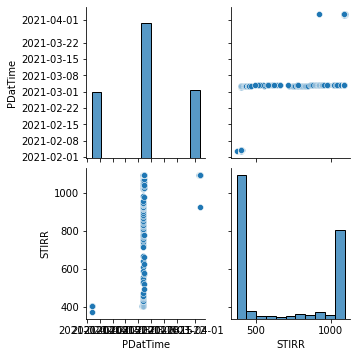

In [34]:
sns.pairplot(df, vars=["PDatTime", "STIRR"])

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interactive
from IPython.display import display

In [54]:
# Get all params
params = list(dft.index[1:])

y1 = params[1]
y2 = params[14]
#print(y1, y2)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df["PDatTime"], y=df[y1], name=y1),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df["PDatTime"], y=df[y2], name=y2),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Ferdi's Double Y Analysis"
)

# Set x-axis title
fig.update_xaxes(title_text="DateTime")

# Set y-axes titles
fig.update_yaxes(title_text=f"<b>primary</b> {y1}", secondary_y=False)
fig.update_yaxes(title_text=f"<b>secondary</b> {y2}", secondary_y=True)

fig.show()

In [50]:
print(my_result.children[0].value) # current value of a
print(my_result.children[1].value) # current value of b

3
7
